# Meal Order Project
* The average price for each dish
* Which dish is most popular
* ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

In [2]:
plt.rcParams["font.sans-serif"] = "SimHei" ## For Chinese shown
%matplotlib inline

## Data Load

In [3]:
data_sht1 = pd.read_excel("./Data/meal_order_detail.xlsx",sheet_name="meal_order_detail1")
data_sht2 = pd.read_excel("./Data/meal_order_detail.xlsx",sheet_name="meal_order_detail2")
data_sht3 = pd.read_excel("./Data/meal_order_detail.xlsx",sheet_name="meal_order_detail3")

## Data Preprocessing
* Merge 3 tables
* NA Deleting
* Exploratory Analysis

In [4]:
data = pd.concat([data_sht1,data_sht2,data_sht3],axis=0) # row bind
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [5]:
data["dishes_name"] = [str(x).replace("_x000D","").replace("\n","").replace("_","")
                       for x in data["dishes_name"]]
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_inprice 

In [7]:
data.dropna(axis=1,inplace=True) ## Delete NA by Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


### Get the Average Price of Dishes
* `np.mean()` is faster

In [8]:
round(data["amounts"].mean(),2),round(np.mean(data["amounts"]),2)

(44.82, 44.82)

### Which Dish is most popular

In [9]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


In [10]:
temp_df = data[["dishes_name","counts"]].groupby("dishes_name").sum()
temp_df.sort_values(by="counts",ascending=False,inplace=True)
temp_df.head()

,counts
dishes_name,
白饭/小碗,560
白饭/大碗,429
凉拌菠菜,272
谷稻小庄,243
麻辣小龙虾,219


In [11]:
temp_df.iloc[:10]

,counts
dishes_name,
白饭/小碗,560
白饭/大碗,429
凉拌菠菜,272
谷稻小庄,243
麻辣小龙虾,219
五色糯米饭(七色),195
蛋挞,192
芝士烩波士顿龙虾,190
辣炒鱿鱼,189


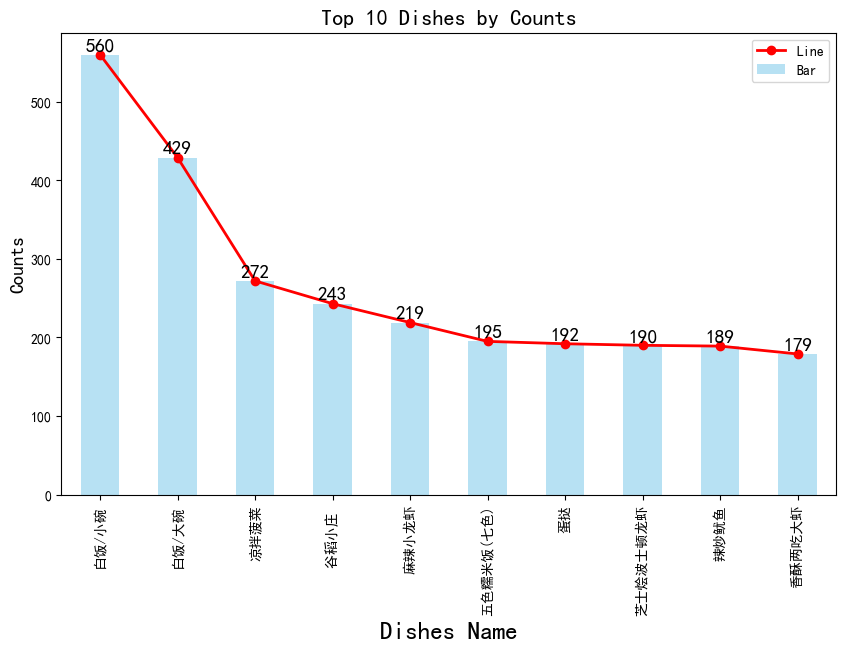

In [12]:
# Select top 10 records for plotting
top_10 = temp_df.iloc[:10]

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
top_10['counts'].plot(kind='bar', ax=ax, color='skyblue', alpha=0.6, label='Bar')

# Plot the line graph on the same axis
top_10['counts'].plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Line')

## Add text
for x in list(range(10)):
    # print(x,top_10["counts"][x])
    plt.text(x,top_10["counts"][x] + 5,
             top_10['counts'][x],
             ha = "center",fontsize=14)
    

# Set labels and title
ax.set_xlabel('Dishes Name', fontsize=18)
# Rotate the x-axis labels vertically
ax.set_xticklabels(top_10.index, rotation=90)

ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Top 10 Dishes by Counts', fontsize=16)

# Enable the legend
ax.legend()

# Show the plot
plt.show()

### What's the Average count of dishes in orders

In [13]:
temp_dict = data[["order_id","counts"]].groupby("order_id").sum().sort_values(by="counts",ascending=False)
temp_dict[:10]

,counts
order_id,
398,36
1033,33
1051,33
1318,31
557,30
1078,30
1228,30
1150,29
1295,29


Text(0, 0.5, '# of dishes')

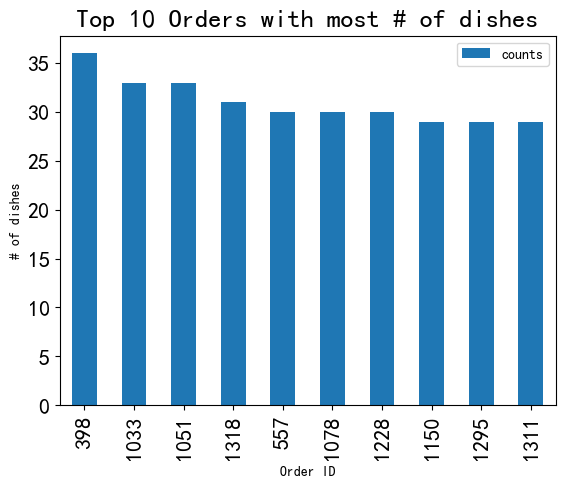

In [14]:
temp_dict[:10].plot(kind="bar",fontsize=16)
plt.title("Top 10 Orders with most # of dishes",fontsize = 19)
plt.xlabel("Order ID")
plt.ylabel("# of dishes")

### Get distribution of cost by order ID

<Axes: ylabel='Frequency'>

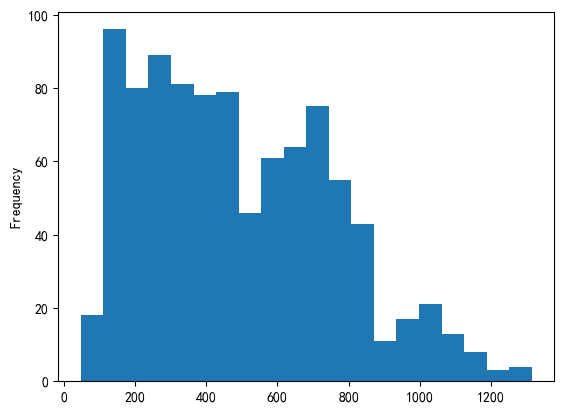

In [15]:
## get cost by order id
data["cost"] = data["counts"] * data["amounts"]
df_group = data[["order_id","counts","amounts","cost"]].groupby(by="order_id")
df_group_sum = df_group.sum()
df_group_sum["cost"].plot(kind="hist",bins = 20)

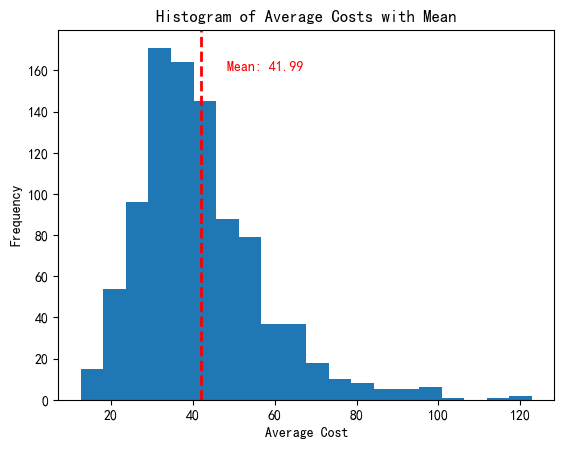

In [16]:
df_group_sum["average"] = (df_group_sum["cost"] / df_group_sum["counts"])

# Calculate the mean of the 'average' column
mean_value = df_group_sum["average"].mean()

df_group_sum["average"].plot(kind="hist",bins = 20)

# Add a vertical red line at the mean value
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

# Add a label for the mean line
plt.text(mean_value + 25, plt.gca().get_ylim()[1] -15,
         f'Mean: {mean_value:.2f}', color = 'red',
         ha='right',va = "top")


# Set the x and y labels and the plot title
plt.xlabel('Average Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Average Costs with Mean')
plt.show()

## Temporal Analysis 
* What's the most popular duration

In [17]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,cost
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13


### What's the order # of each hour and day

In [18]:
## Transfer to datetime object
data["time"] = pd.to_datetime(data["place_order_time"])
data["hour"] = data["time"].map(lambda x: x.hour)
data["day"] = data["time"].map(lambda x: x.day)
df_group_sum = data[["hour","counts"]].groupby("hour").sum()
df_group_sum


,counts
hour,
11,1022
12,915
13,888
14,140
17,1231
18,1726
19,1619
20,1709
21,1662


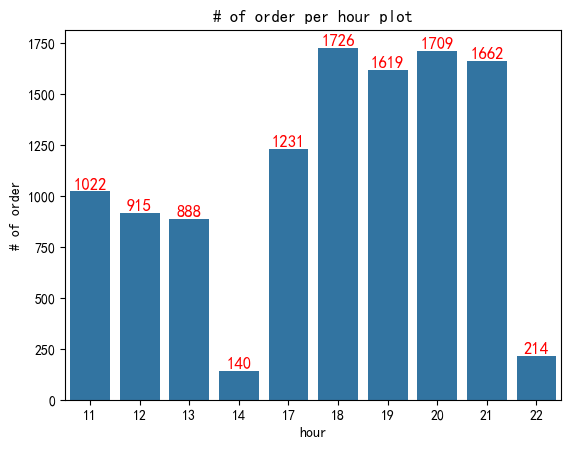

In [19]:
sns.barplot(y= df_group_sum["counts"].values, x= df_group_sum.index)
plt.title("# of order per hour plot")
plt.ylabel("# of order")

for i in list(range(df_group_sum.shape[0])):
    plt.text(i,df_group_sum["counts"].values[i] + 10, df_group_sum["counts"].values[i],
             color = "red",fontsize = 12, ha = "center")
plt.show()

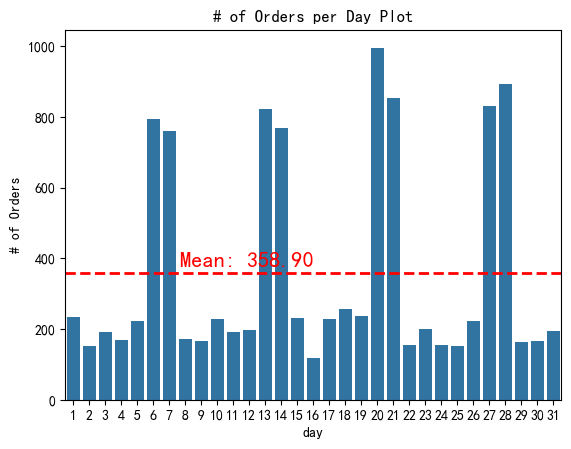

In [20]:
df_group_sum = data[["day","counts"]].groupby("day").sum()
mean_value = df_group_sum["counts"].mean()

# Create a barplot
sns.barplot(y= df_group_sum["counts"].values, x= df_group_sum.index)

# Add a horizontal red dashed line for the mean
plt.axhline(mean_value, color='red', linestyle='dashed', linewidth=2)

# Add text annotation for the mean line
plt.text(len(df_group_sum.index)//2, mean_value +10,
         f' Mean: {mean_value:.2f}',fontsize = 16, color='red', va='bottom', ha='right')

# Set the title and labels
plt.title("# of Orders per Day Plot")
plt.ylabel("# of Orders")

# Show the plot
plt.show()

### Check by Weekdays

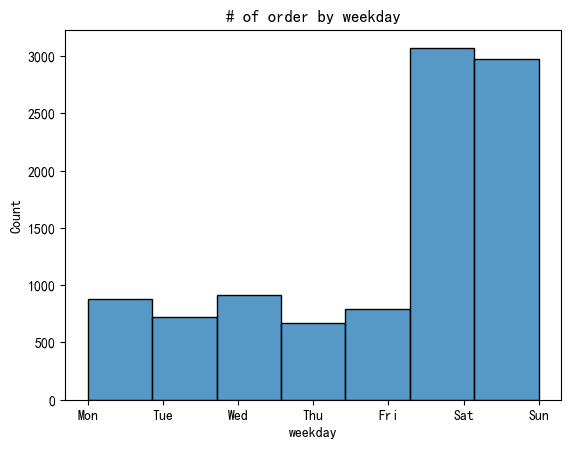

In [21]:
data["weekday"] = data["time"].map(lambda x:x.weekday() + 1) ## Default, 0 = Monday
sns.histplot(data["weekday"],bins=7)
plt.title("# of order by weekday")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()